<html> <img style="float:center; margin: 0px 0px 0px 0px;" src="https://docs.google.com/uc? export=download&id=1jIxUCriI-tyCAkUYHz05rk5SY_rTHRV9" width="220" align="left"/> </html> 

<figure>
<center>
<img src='https://docs.google.com/uc?export=download&id=1BmLEthy7KCNsnVFviFKX77zLmFhc47XZ' align='right'width="220"/>
    
<figcaption>

</figcaption></center>
</figure>
<center> <H1> Analyse et Programmation avec Python </H1> </center>
<center> <H6> Janvier 2020 </H6> </center>


Enseignant : Jaafar Chaaouri

Email: Jaafar.chaaouri@fsm.rnu.tn

---

# Visualisation avec Matplotlib
Les bases de la visualisation avec le module `matplotlib` https://matplotlib.org/  
Quelques mots sur seaborn, plotly, bokeh, etc.



Inspiré de Matlab. 

2 façons de l'utiliser :  
- soit avec une approche objet : plus compliquée et plus verbeuse, mais plus évoluée.
- soit via des appels de fonctions, avec `pyplot` : plus simple.   

`pyplot` fournit ainsi des raccourcis qui évitent la formulation objet plus longue à écrire ;
permet de faire des graphes qui peuvent être complètement adaptés si besoin. 
Sur une figure, on peut aussi tracer plusieurs graphes. 



In [2]:
# Import matplotlib
import matplotlib.pyplot as plt

# magic pour afficher les graphiques dans le notebook
%matplotlib inline

# Autres imports
import numpy as np
import math

## La commande ``plot``

Des graphique basiques peuvent être crées avec la commande `plt.plot` :

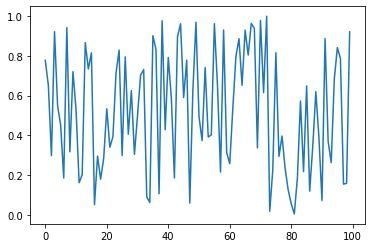

In [4]:
random_numbers = np.random.rand(100)
plt.plot(random_numbers);

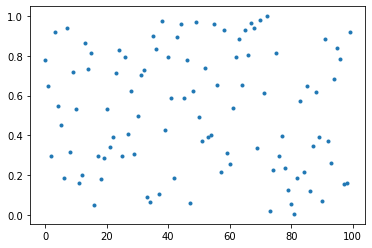

In [5]:
plt.plot(random_numbers, '.');

Note : pour afficher un nuage de points on verra `plt.scatter` en TP

Ci-dessus on a utilisé `plt.plot(y)`; on peut aussi faire `plt.plot(x, y)`:

#### Plot d'une fonction: $f(x) = \sin(x)$



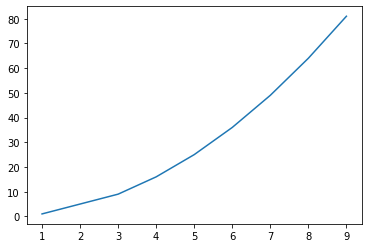

In [8]:
x =[1,3,4,5,6,7,8,9]
x=np.array(x)
y = x*x
plt.plot(x, y)

#### Titres, légendes, etc.

La fonction `` plt.plot () `` est une fonction à tout faire. En ajoutant d’autres
fonctions `` plt``, vous pouvez également ajouter d'autres éléments au tracé.

Voici comment faire un simple graphe de $ \ sin (x) $ et $ \ sin (x ^ 2) $ pour $ x \ in [0, 2 \ pi] $ 

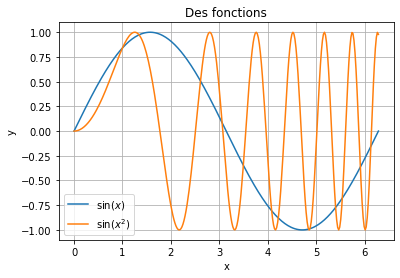

In [ ]:
y2 = np.sin(x**2)
plt.plot(x, y, label=r'$\sin(x)$')
plt.plot(x, y2, label=r'$\sin(x^2)$')
plt.title('Des fonctions')
plt.xlabel('x')
plt.ylabel('y')
plt.grid()
plt.legend();

In [ ]:
# plt.plot?

### Barres d'erreur

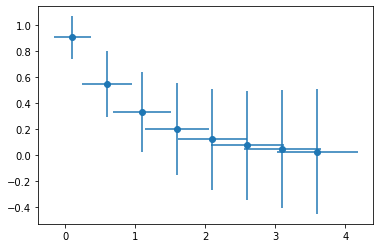

In [ ]:
# exemple de données
x = np.arange(0.1, 4, 0.5)
y = np.exp(-x)

# des valeurs d'erreurs arbitraires
yerr = 0.1 + 0.2*np.sqrt(x)
xerr = 0.1 + yerr

plt.figure()
plt.errorbar(x, y, xerr=xerr, yerr=yerr, fmt='o');

### Echelles logarithmiques
Voir ``plt.semilogx``, ``plt.semilogy`` et ``plt.loglog``

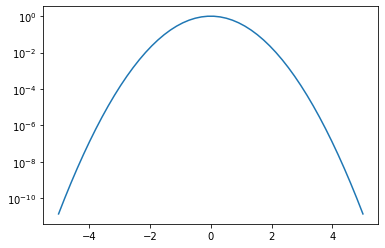

In [ ]:
x = np.linspace(-5, 5)
y = np.exp(-x**2)
plt.semilogy(x, y);
plt.

### Histogrammes
``plt.hist(x, bins)``

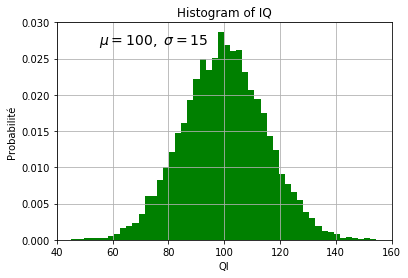

In [ ]:
mu, sigma = 100, 15
x = mu + sigma * np.random.randn(10000)

# histogramme des données
n, bins, patches = plt.hist(x, 50, density=True, facecolor='g')

plt.xlabel('QI')
plt.ylabel('Probabilité')
plt.title('Histogram of IQ')
# This will put a text fragment at the position given:
plt.text(55, .027, r'$\mu=100,\ \sigma=15$', fontsize=14)
plt.axis([40, 160, 0, 0.03])
plt.grid(True)

### Matrices 2D ou images
`plt.imshow`

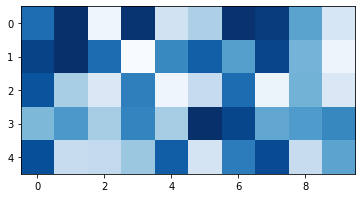

In [ ]:
plt.imshow(np.random.rand(5,10), interpolation='nearest', cmap='Blues');

In [ ]:
img = plt.imread('img/stoplight.png')
img.shape

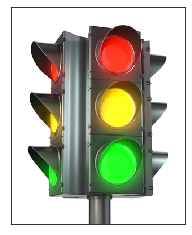

In [ ]:
plt.imshow(img)
plt.xticks([])
plt.yticks([]);

### Subplots

Visualisons chaque canal R, G et B séparément

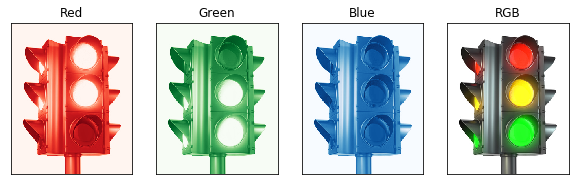

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(10,6),
                       subplot_kw=dict(xticks=[], yticks=[]))

for i, cmap in enumerate(['Red', 'Green', 'Blue']):
    ax[i].imshow(img[:,:,i], cmap=cmap + 's_r')
    ax[i].set_title(cmap)
ax[3].imshow(img)
ax[3].set_title('RGB');

Pour aller plus loin : galerie d'exemples https://matplotlib.org/gallery.html  
Un truc pratique pour charger un exemple dans un notebook : utiliser la commande magique `%load` :

Dans la galerie :
https://matplotlib.org/examples/images_contours_and_fields/streamplot_demo_features.html  
Source code > Copier l'adresse du lien   et l'ajouter après `%load`:

In [ ]:
# %load https://matplotlib.org/mpl_examples/images_contours_and_fields/streamplot_demo_features.py

## Seaborn
Les critiques à Matplotlib :  
- Les paramètres par défauts ne sont pas toujours les meilleurs choix (issus de MatLab 1999).  
- Assez bas niveau : on peut quasiment tout faire mais cela demande beaucoup de code et de se plonger dans une riche documentation.  
- Matplotlib n'est pas conçu pour être utilisé avec les dataframes Pandas (voir plus loin). Pour les visualtions de données dans Pandas il va falloir les extraires les transformer dans le format adécuat.  
`Seaborn` répond en partie à ces problèmes : une API au-dessus de matplolib avec des configurations par défaut rendant les visualisations plus lisibles, des fonctions simplifiées pour les graphiques les plus courants et s'intégrant avec Pandas. 

S'importe conventionnellement avec :  

In [ ]:
import seaborn as sns

In [ ]:
# pour fixer le style seaborn par défaut dans Matplotlib
sns.set(color_codes=True)

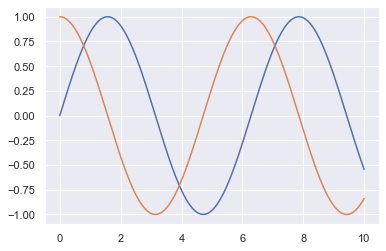

In [ ]:
# avec Seaborn
x = np.linspace(0, 10, 1000)
plt.plot(x, np.sin(x), x, np.cos(x));

Démo avec Pandas:

In [ ]:
import pandas as pd

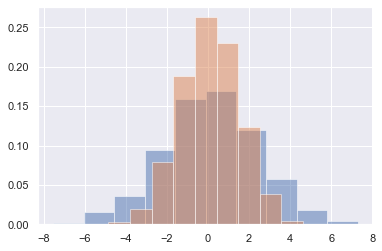

In [ ]:
data = np.random.multivariate_normal([0, 0], [[5, 2], [2, 2]], size=2000)
data = pd.DataFrame(data, columns=['x', 'y'])

for col in 'xy':
    plt.hist(data[col], density=True, alpha=0.5)

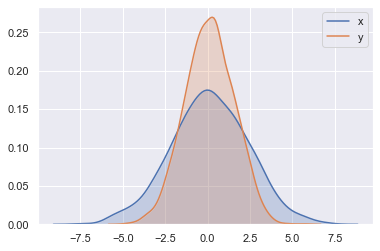

In [ ]:
for col in 'xy':
    sns.kdeplot(data[col], shade=True)

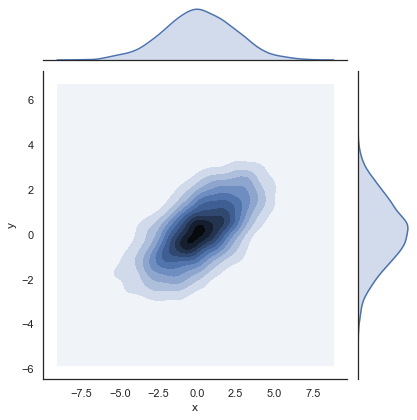

In [ ]:
with sns.axes_style('white'):
    sns.jointplot("x", "y", data, kind='kde');

Autres librairies de visualisation: 
- Bokeh https://bokeh.pydata.org/en/latest/ intéractivité  
- Plotly https://plot.ly/python/ intéractivité, orienté vers la publication web   
- Altair https://altair-viz.github.io/ déclaratif (basé sur Véga)
- et bien d'autres